 # Simulazione di particella quantistica:

Utilizzando l'algoritmo di Metropolis dove l'accettazione è rappresentata dal quadrato della funzione d'onda $( \ |\Psi_T(x)|^2 \ )$ e la transizione proposta è di tipo uniforme in un box di simulazione sottoposto a PBC che permetta il verificarsi della regola empirica del 50%, simulare una particella quantistica in uno spazio mono-dimensionale.

In tale spazio vige un potenziale esterno $V(x) = x^4 - \frac{5}{2}x^2$, e si consideri una funzione d'onda parametrica (di parametri $\mu$ e $\sigma$) di test descritta da:

$$\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+e^{-\frac{(x+\mu)^2}{2\sigma^2}}$$

attraverso la quale si desidera, ottimizzando i parametri liberi, descrivere numericamente, nella maniera più efficacie possibile, il comportamento della particella considerata.

Utilizzando, quindi, il data blocking stimare il valore di aspettazione dell'operatore Hamiltoniano:

$$\langle {\hat H} \rangle_T = \frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}{\int dx |\Psi_T(x)|^2} = \int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}$$

dove si rammenta che la parte cinetica di tale operatore è $\hat T = -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}$.


#### - Esecuzione

Si definiscono arbitrariamente i parametri per il data blocking:
- N= 100 blocchi;
- L= $10^4$ simulazioni per blocco;
- M= $10^6$ simulazioni totali;

quindi si definiscono le funzioni utili per tale algoritmo.

In [1]:

import math


def Media (X, i, z) :              #attenzione: z è la posizione nell'array
    return sum( X[i:z+1] )/(z-i+1)

def Err (X, i, z):                #attenzione z è la posizione nell'array, vale N=(z+1) ovvero (N-1)=z
    if z==i :
        return 0
    return math.sqrt( (Media(X**2,i,z) - Media(X,i,z)**2) / z )


Si importano da file N=100 blocchi simulati dal codice C++.\
In tale simulazione si sono fissati arbitrariamente i parametri $\mu= 0.82$ e $\sigma=0.64$, che manualmente si sono visti ben approssimare la funzione d'onda $\Psi_0(x)$ dello stato fondamentale avente Energia pari a $E_0=-0.46046$.

In [2]:

import numpy


H= numpy.loadtxt( "8.1/out.txt", usecols= (0), delimiter= "\t", unpack= 'true' )


Si produce quindi un grafico dell'andamento nei blocchi del valor medio e dell'incertezza stimata dell'Energia della particella.

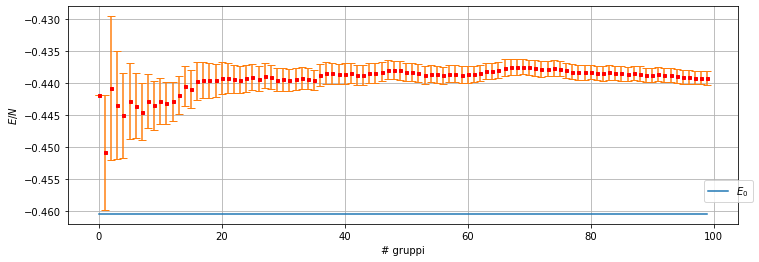

In [3]:

import matplotlib.pyplot as plt


AvH= numpy.zeros( numpy.size(H) )
dev_AvH= numpy.zeros( numpy.size(H) )

for i in range( numpy.size(H) ):
    AvH[i]= Media (H,0,i)
    dev_AvH[i]= Err (H,0,i)
    
N = numpy.arange ( numpy.size(AvH) )   

plt.figure(figsize=(12, 4))
plt.plot(-0.46046+numpy.zeros(100), label= r"$E_0$")
plt.errorbar( N, AvH, yerr= dev_AvH, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3, 
              linestyle= "none")
plt.xlabel('# gruppi')
plt.ylabel(r'$E/N$')
plt.grid(True)
plt.legend(bbox_to_anchor=(0.95, 0.2), loc='upper left', borderaxespad=0.)

plt.show()


Come si può osservare il valore converge nel numero di blocchi, con un errore in riduzione nel numero di blocchi considerati.\
Tuttavia sebbene si sia cercato manualmente di ottimizzare i parametri della funzione di test, essi rappresentano una discreta raffigurazione dello di $\Psi_0(x)$, che può essere migliorata tramite una ricerca automatizzata, ma che difficilmente potrà, nel discreto, rappresentare l'effettivo stato desiderato e la sua tipica energia. 

### -----------------------------------------------------------------------------------------------------------------------------------------------------------

 # Simulazione di una particella quantistica (parte seconda):

Sfruttando il codice precedentemente prodotto, applicarvi un metodo variazionale alla ricerca dei parametri $\tilde \mu$ e $\tilde \sigma$ che meglio approssimano lo stato fondamentale $\Psi_0$, secondo la minimizzazione dell'energia in tale stato:

$$
\langle {\hat H} \rangle_T = \frac{\langle \Psi_T^{\sigma,\mu}| {\hat H} | \Psi_T^{\sigma,\mu} \rangle}
{\langle \Psi_T^{\sigma,\mu} | \Psi_T^{\sigma,\mu} \rangle} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

Eseguire quindi una simulazione che permetta tramite data blocking di stimare valor medio ed incertezza dell'energia nella configurazione descritta dalla funzione d'onda $\Psi_T^{\tilde \sigma,\tilde \mu}(x)$; infine, produrre un istogramma di $|\Psi_T^{\tilde \sigma,\tilde \mu}(x)|^2$, che rappresenta tra le altre cose la probabilità di transizione del Metropolis utilizzato, e confrontarla con quella del vero stato fondamentale (fornita nel materiale di supporto).


Si definiscono arbitrariamente i parametri per il data blocking:
- N= 100 blocchi;
- L= $10^4$ simulazioni per blocco;
- M= $10^6$ simulazioni totali;

quindi si utilizzano nuovamente le funzioni precedentemente descritte per questo algoritmo statistico.

#### - Applicazione del metodo variazionale:
Al fine di stimare il minimo di energia, si è implementato il seguente metodo:
- si è scelto un range per ogni parametro libero entro cui cercare il il valore migliore di tale parametro, in un intorno dei valori utlizzati nell'esercizio precedente (ricavati manualmente); in particolare $\tilde \mu$ = [0.77,0.87] e $\tilde \sigma$ = [0.57,0.67].
- si sono scelte arbitrariamente $10^4$ coppie $(\tilde \mu$,$\tilde \sigma)$ su cui eseguire una simulazione di $5$x$10^4$ step al fine di calcolare efficacemente il valor medio di energia di tale stato.
- al termine, ottenuta quindi la coppia di parametri che hanno minimizzato l'energia, si è eseguita un'effettiva simulazione di N blocchi di L elementi al fine di meglio valutare l'energia e di stimarne l'errore.

Si noti che avendo eseguito la ricerca su un numero di step Monte Carlo inferiori a quelli utilizzati per il data blocking finale, è possibile che la successiva stima più accuarata del valor medio dell'energia si discosti da quello utilizzato per valutare le coppie $(\tilde \mu$,$\tilde \sigma)$. Ciò per motivi computazionali è inevitabile qualora si voglia eseguire in tempi ragionevoli un numero elevato di tentativi sulle coppie $(\tilde \mu$,$\tilde \sigma)$; tuttavia utilizzare altresì un numero limitato di M simulazioni per l'algoritmo di media a blocchi avrebbe poco significato in termini di convergenza per il CLT.\
Tenendo presente ciò si è cercato di eseguire una simulazione coerente con l'obiettivo, ma che non necessitasse di tempi di attuazione eccessivi.

Di seguiro sono riportati i valori dei parametri stimati.

In [4]:

mu, sigma, E= numpy.loadtxt ( "8.2/parametri.txt", usecols= (0,1,2), delimiter= "\t", unpack= 'true' )


print ("Migliori parametri stimati:")
print (" - mu    =", mu)
print (" - sigma =", sigma)
print (" - E0    =", E)


Migliori parametri stimati:
 - mu    = 0.80104
 - sigma = 0.616577
 - E0    = -0.454524


Di seguito si riporta secondo il numero di blocchi, l'andamento del valor medio dell'energia e relativo errore stimato mediante data blocking.

In [5]:

H= numpy.loadtxt( "8.2/out.txt", usecols= (0), delimiter= "\t", unpack= 'true' )


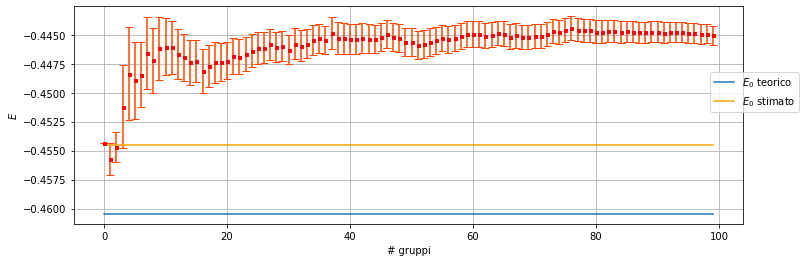

In [6]:

AvH= numpy.zeros( numpy.size(H) )
dev_AvH= numpy.zeros( numpy.size(H) )

for i in range( numpy.size(H) ):
    AvH[i]= Media (H,0,i)
    dev_AvH[i]= Err (H,0,i)
    
N = numpy.arange ( numpy.size(AvH) )   

plt.figure(figsize=(12, 4))
plt.plot (-0.46046+numpy.zeros(100), label= r"$E_0$ teorico")
plt.plot (E+numpy.zeros(100), label= r"$E_0$ stimato", color= "orange" )
plt.errorbar( N, AvH, yerr= dev_AvH, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3, 
              color= "orangered", linestyle= "none")
plt.xlabel('# gruppi')
plt.ylabel(r'$E$')
plt.grid(True)
plt.legend(bbox_to_anchor=(0.95, 0.7), loc='upper left', borderaxespad=0.)

plt.show()


Come si può notare la simulazione breve alla ricerca della coppia $(\tilde \mu$,$\tilde \sigma)$ che minimizzassero l'energia, descrivendo quindi la funzione d'onda di stato fondamentale approssimata, è compatibile l'andamento nei blocchi di quanto stimato dal data blocking per i primi passi comuni, quindi lo stabilizzarsi nel tempo del valor medio dell'energia, converge ad un valore incompatibile.

Altresì è plausibile pensare che il range di ricerca dei parametri non sia ottimale, sebbene manualente in un intorno di dove si è ricercato si sono trovati parametri che corrispondessero a valori di energia simili ad E$_0$ (minimo locale).

Infine, sarebbe stato altresì corretto utilizzare tecniche diverse per la scelta arbitraria dei parametri $(\tilde \mu$,$\tilde \sigma)$ di test:
- una griglia discreta 2D di valori centrata su un punto di partenza consono (quale ad esempio una ricerca manuale precedente);
- una distribuzione gaussiana dei due parametri, ognuna delle due centrata su un punto consono, e di ampiezza variabile secondo le esigenze;

#### - grafico della funzione d'onda  $|\Psi_T^{\tilde \sigma,\tilde \mu}(x)|^2$:

Di seguito si riporta il profilo del quadrato della funzione d'onda stimata meglio approssimare lo stato fondamentale $\Psi_0$, tramite un istogramma tratto dall'evoluzione dell'algoritmo di Metropolis.

In [7]:

Psi= numpy.loadtxt( "8.2/funzioned'onda.txt", usecols= (0), delimiter= "\t", unpack= 'true' )


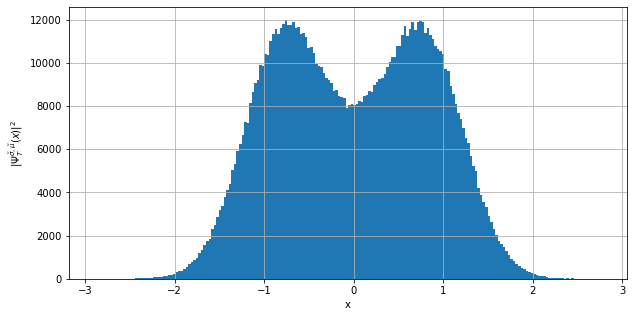

In [8]:

nbin= 200
max= numpy.amax(Psi)
min= numpy.amin(Psi)

plt.figure(figsize=(10, 5))
plt.hist(Psi, nbin)
plt.xlabel('x')
plt.ylabel(r'$|\Psi_T^{\tilde \sigma,\tilde \mu}(x)|^2$')
plt.grid(True)

plt.show()


Di seguito si compara, invece, quanto ottenuto in precedenza, opportunamente normalizzato, con quanto fornito nel materiale di supporto ove si risolvono analiticamente (con qualche approssimazione) calcoli quantistici alla ricerca della effettiva funzione d'onda di stato fondamentale $\Psi_0$.

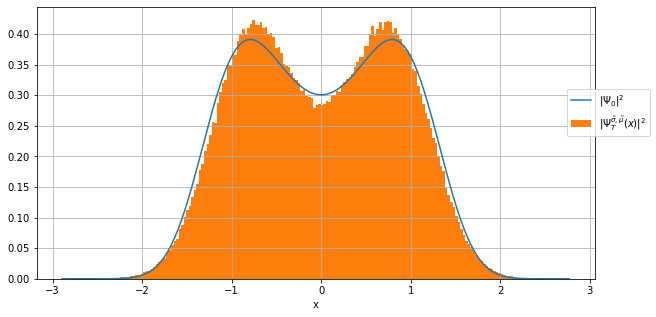

In [9]:

def Vpot(x):
    return (x**2 - 2.5)*x**2


hbar = 1
m = 1
max= numpy.amax(Psi)       #estermi dell'intervallo desiderato
min= numpy.amin(Psi)
N = 1000                   #numero di interazioni

#approssimazione della derivata
x = numpy.linspace(min, max, N)
dx = x[1] - x[0]
V = Vpot(x)

CDiff = numpy.diag(numpy.ones(N-1),-1)-2*numpy.diag(numpy.ones(N),0)+numpy.diag(numpy.ones(N-1),1)

# matrice Hamiltoniana + autovalori e autovettori
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + numpy.diag(V)
E,psi = numpy.linalg.eigh(H)

# normalizzazione
psi = numpy.transpose(psi)
psi = psi/numpy.sqrt(dx)
weights= numpy.ones_like(Psi)/float(numpy.size(Psi))

plt.figure(figsize=(10,5))
plt.plot(x,(psi[0])**2, label= r'$|\Psi_0|^2$')
plt.hist(Psi, nbin, density= "true", label= r'$|\Psi_T^{\tilde \sigma,\tilde \mu}(x)|^2$' )
plt.xlabel("x")
plt.grid(True)
plt.legend(bbox_to_anchor=(0.95, 0.7), loc='upper left', borderaxespad=0.)

plt.show()


Come si può osservare vi è una buona compatibilità sulle code della distribuzione graficata, mentre intorno al minimo e ai massimi locali vi è una notevole discrepanza, frutto delle limitazioni descritte in precedenza.\
Tuttavia la forma generale ricorda discretamente $|\Psi_0|^2$.